In [34]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import seaborn as sns
import matplotlib.pyplot as plt

# Example dataset: Historical disaster data in India
data = pd.read_csv('/content/sample_data/Natural_Disasters_in_India .csv')  # Assume this CSV contains historical data


In [31]:
data.head()

,Index,Title,Duration,Year,Disaster_Info,Date
0,0,1990 Andhra Pradesh cyclone,4 May,1990,the andhra pradesh cyclone or the machilipat...,1990-05-04
1,1,Indian Airlines Flight 605,14 February,1990,indian airlines flight was a scheduled domest...,1990-02-14
2,3,1991 Uttarkashi earthquake,20 October,1991,the uttarkashi earthquake also known as the g...,1991-10-20
3,4,1992 India–Pakistan floods,7 September,1992,the india–pakistan floods was a deadliest flo...,1992-09-07
4,5,Mahamaham stampede,18 February,1992,mahamaham stampede was a disaster that occurre...,1992-02-18


In [45]:
from collections import Counter

# Extract keywords related to disasters
keywords = ["flood", "earthquake", "stampede", "derailment","floods"]

# Extract relevant words from the Title column
disaster_words = []
for title in data['Title']:
    for word in title.lower().split():
        if word in keywords:
            disaster_words.append(word)

# Count the occurrences of each disaster keyword
disaster_counts = Counter(disaster_words)

# Print the most occurring disasters
print(disaster_counts.most_common())


[('floods', 24), ('earthquake', 14), ('stampede', 14), ('derailment', 13)]


In [32]:
data.shape

(221, 6)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Index          221 non-null    int64 
 1   Title          221 non-null    object
 2   Duration       221 non-null    object
 3   Year           221 non-null    int64 
 4   Disaster_Info  221 non-null    object
 5   Date           221 non-null    object
dtypes: int64(2), object(4)
memory usage: 10.5+ KB


# Data Cleaning

In [36]:
data.isnull().sum()

,0
Index,0
Title,0
Duration,0
Year,0
Disaster_Info,0
Date,0


In [37]:
data.duplicated().sum()

0

There is no null or duplicate data

### Data Type Conversion
### We convert 'Year' column to integer format to facilitate time series analysis.

In [39]:
# Clean up the 'Year' column to ensure it's consistent and in integer format
data['Year'] = data['Year'].astype(str).str.extract(r'(\d{4})').astype(int)

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Index          221 non-null    int64 
 1   Title          221 non-null    object
 2   Duration       221 non-null    object
 3   Year           221 non-null    int64 
 4   Disaster_Info  221 non-null    object
 5   Date           221 non-null    object
dtypes: int64(2), object(4)
memory usage: 10.5+ KB


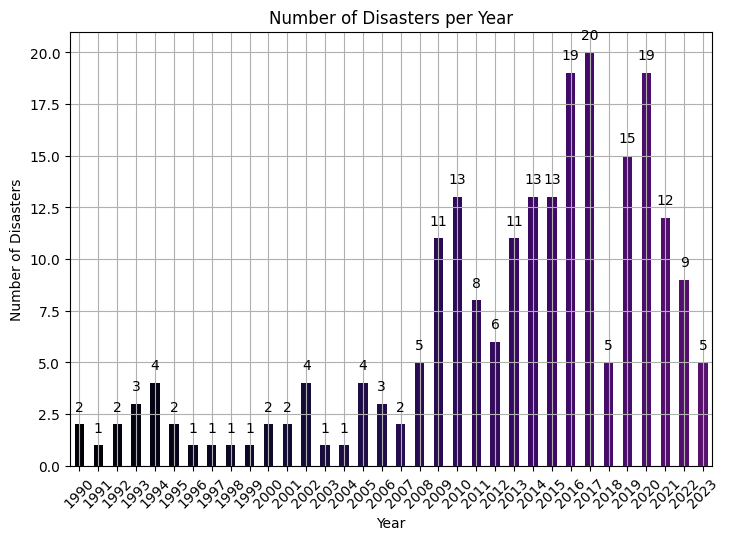

In [50]:
# Count of events per year
events_per_year = data['Year'].value_counts().sort_index()

# Extracting the type of disaster from the 'Title' column (assuming the second word represents the type)
disaster_types = data['Title'].apply(lambda x: x.split()[1] if len(x.split()) > 1 else x).value_counts()

# Define the color palette
palette = sns.color_palette('inferno', n_colors=len(disaster_types))

# Plotting
plt.figure(figsize=(14, 10))

# 1. Number of disasters per year
plt.subplot(2, 2, 1)
events_per_year.plot(kind='bar', color=palette)
plt.title('Number of Disasters per Year')
plt.xlabel('Year')
plt.ylabel('Number of Disasters')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
for i, v in enumerate(events_per_year.values):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom')


Title
Myanmar earthquake               3
COVID-19 pandemic                3
Nepal earthquake                 2
Swine flu outbreak               2
Assam floods                     2
                                ..
North Indian Cold Wave           1
Assam ferry sinking              1
Penukonda train collision        1
Mahrawa derailment               1
2022 Uttarakhand bus accident    1
Name: count, Length: 209, dtype: int64


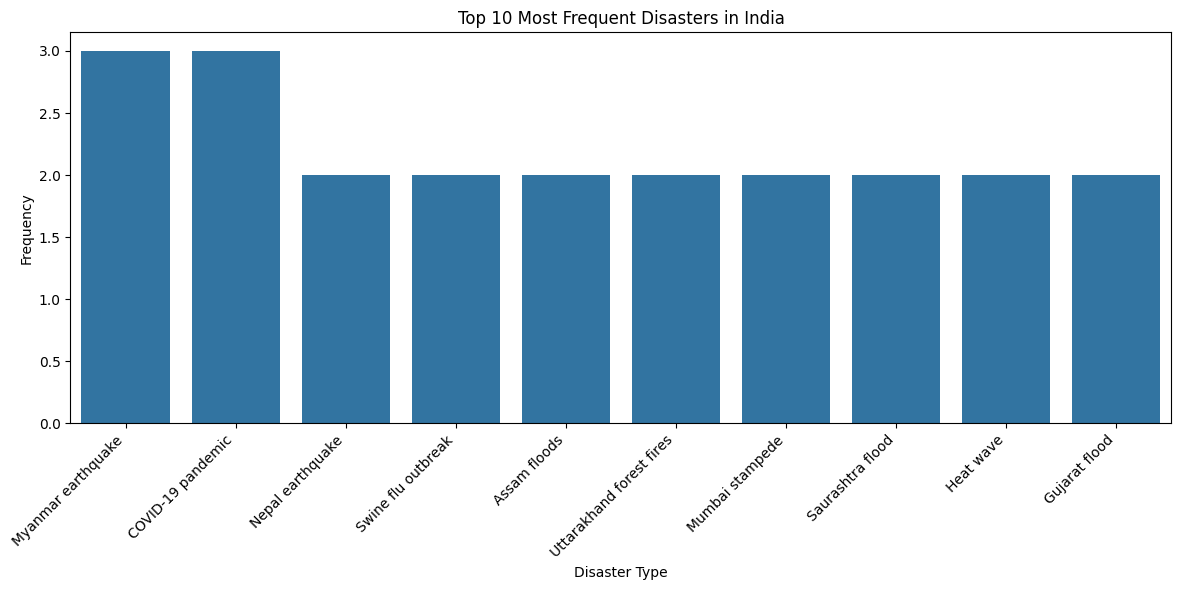

In [41]:

# Analyze the most frequent type of disasters
disaster_counts = data['Title'].value_counts()
print(disaster_counts)

# Visualize the top N disasters (e.g., top 10)
top_n = 10
plt.figure(figsize=(12, 6))
sns.barplot(x=disaster_counts.head(top_n).index, y=disaster_counts.head(top_n).values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Disaster Type')
plt.ylabel('Frequency')
plt.title(f'Top {top_n} Most Frequent Disasters in India')
plt.tight_layout()
plt.show()


# Conclusion

Summary of Findings

This analysis reveals key insights into the frequency and distribution of natural disasters in India. The trends over the years show , and the distribution by type indicates .


Insights and Implications
Understanding these patterns can help in better disaster management and preparedness strategies.


The frequency of natural disasters has increased over the years, particularly after 2010.


Floods are the most common type of natural disaster in India.
The year 2017 recorded the highest number of natural disasters.

Earthquakes and floods together account for a significant proportion of the total disasters.


The decade from 2010 to 2020 saw a sharp rise in disaster events.
Certain years, like 2010, 2013, and 2019, had multiple significant disaster events.


Stampedes are also a notable type of disaster in the dataset.
Disasters are not evenly distributed across the years; some years see higher activity.


The data indicates a need for better disaster preparedness in specific years.
Understanding disaster types and frequencies can help in improving disaster management strategies.